## Linear Regression
***

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

from utils.data_manipulation import train_test_split, polynomial_features
from utils.data_operation import mean_squared_error
from utils.misc import Plot

from supervised_learning.linear_models.regression import LinearRegression

%load_ext autoreload
%autoreload 2

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

n_samples, n_features = np.shape(X)

In [3]:
model_OLS = LinearRegression(n_iterations=100)
model_OLS.fit(X_train, y_train)

sample_weights = 1 / np.linalg.norm(X_train - np.mean(X_train, axis=1), axis=1)
model_WLS = LinearRegression(n_iterations=100)
model_WLS.fit(X_train, y_train, sample_weights=sample_weights)

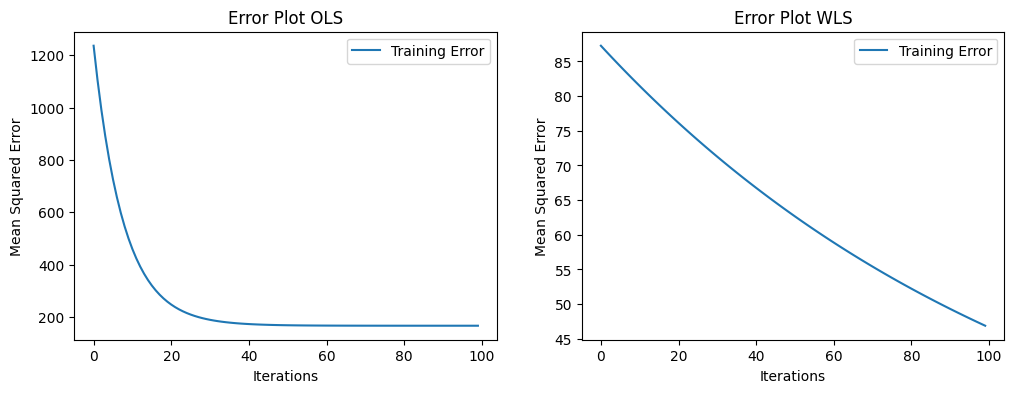

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot of the training error for OLS
n_OLS = len(model_OLS.training_errors)
training_OLS, = axs[0].plot(range(n_OLS), model_OLS.training_errors, label="Training Error")
axs[0].legend(handles=[training_OLS])
axs[0].set_title("Error Plot OLS")
axs[0].set_ylabel("Mean Squared Error")
axs[0].set_xlabel("Iterations")

# Plot of the training error for WLS
n_WLS = len(model_WLS.training_errors)
training_WLS, = axs[1].plot(range(n_WLS), model_WLS.training_errors, label="Training Error")
axs[1].legend(handles=[training_WLS])
axs[1].set_title("Error Plot WLS")
axs[1].set_ylabel("Mean Squared Error")
axs[1].set_xlabel("Iterations")

plt.show()

In [9]:
y_pred_OLS = model_OLS.predict(X_test)
mse_OLS = mean_squared_error(y_test, y_pred_OLS)
print("Mean squared error OLS: %s" % (mse_OLS))

y_pred_WLS = model_WLS.predict(X_test)
mse_WLS = mean_squared_error(y_test, y_pred_WLS)
print("Mean squared error WLS: %s" % (mse_WLS))

Mean squared error OLS: 643.4603175829512
Mean squared error WLS: 1803.3784437303823


In [11]:
y_pred_line_OLS = model_OLS.predict(X)
y_pred_line_WLS = model_WLS.predict(X)

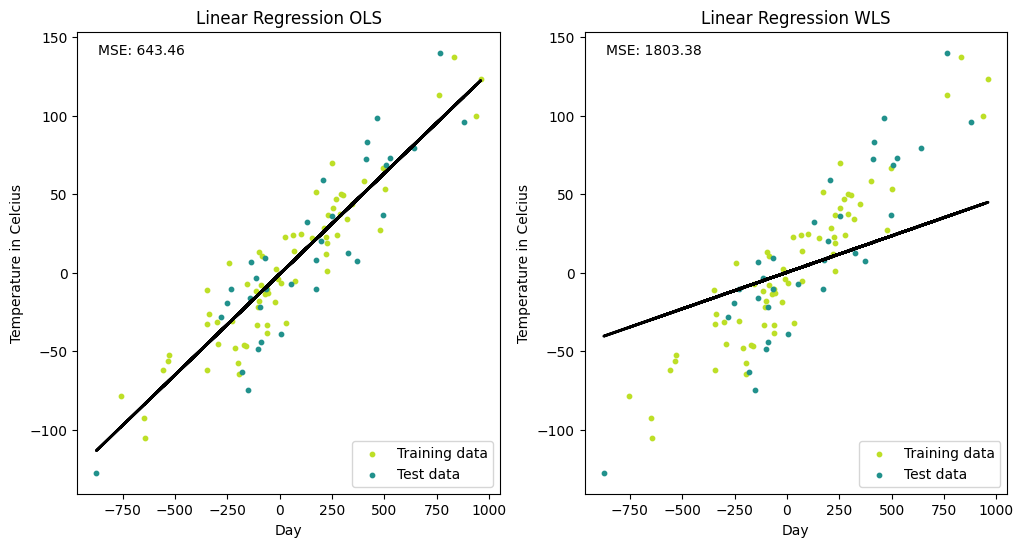

In [13]:
cmap = plt.get_cmap('viridis')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# OLS regression subplot
m1 = ax1.scatter(366 * X_train, y_train, color=cmap(0.9), s=10)
m2 = ax1.scatter(366 * X_test, y_test, color=cmap(0.5), s=10)
ax1.plot(366 * X, y_pred_line_OLS, color='black', linewidth=2, label="Prediction")
ax1.set_title("Linear Regression OLS")
ax1.set_xlabel("Day")
ax1.set_ylabel("Temperature in Celcius")
ax1.legend((m1, m2), ("Training data", "Test data"), loc="lower right")
ax1.text(0.05, 0.95, "MSE: %.2f" % mse_OLS, fontsize=10, transform=ax1.transAxes)

# WLS regression subplot
m1 = ax2.scatter(366 * X_train, y_train, color=cmap(0.9), s=10)
m2 = ax2.scatter(366 * X_test, y_test, color=cmap(0.5), s=10)
ax2.plot(366 * X, y_pred_line_WLS, color='black', linewidth=2, label="Prediction")
ax2.set_title("Linear Regression WLS")
ax2.set_xlabel("Day")
ax2.set_ylabel("Temperature in Celcius")
ax2.legend((m1, m2), ("Training data", "Test data"), loc="lower right")
ax2.text(0.05, 0.95, "MSE: %.2f" % mse_WLS, fontsize=10, transform=ax2.transAxes)

plt.show()